In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seg_volt = np.array([200, 150, 20, 100, 20, 150, 200])
coeff = seg_volt/100.0

In [3]:
u_base = {"xy": [], "yz": {}, "xz": []}
for n in ["12", "38", "49", "510", "611", "712"]:
    for plane in ["xy", "yz", "xz"]:
        f=open("u_{}_z_list_start=8_{}=100V.pkl".format(plane,n), "r")
        u_base[plane].append(pkl.load(f))
        f.close()

AttributeError: 'dict' object has no attribute 'append'

In [8]:
f=open("u_yz_z_list_start=8_38=100V.pkl", 'r')
u_yz_list = pkl.load(f)
f.close()

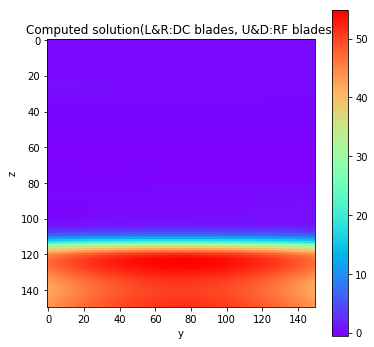

In [9]:
n_grid_points=150
u_yz = u_yz_list.reshape((n_grid_points,n_grid_points))


# Plot the image

plt.figure(figsize=(6,6))
# cmap = sns.diverging_palette(220, 20, n=7,as_cmap=True)
data = u_yz.T
plt.imshow(data,aspect=1.0,cmap='rainbow')
plt.title('Computed solution(L&R:DC blades, U&D:RF blades)')
plt.xlabel('y')
plt.ylabel('z')
plt.colorbar()

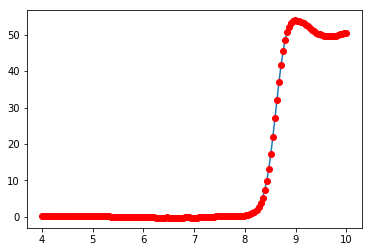

In [10]:
plt.plot(np.linspace(4, 10, n_grid_points), u_yz[50,:])
plt.plot(np.linspace(4, 10, n_grid_points), u_yz[50,:],'ro')

In [11]:
u_yz[50,0]

0.1902483325998193

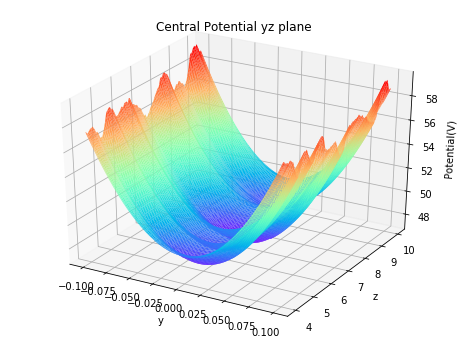

In [104]:
import mpl_toolkits.mplot3d
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3

z1 = 4
z2 = 10
yz_grid = np.mgrid[-0.1:0.1:n_grid_points*1j,     # 指定x范围，1j不表示虚数，而是指grid包含两个端点。
                     z1:z2:n_grid_points*1j]     # 指定y范围
                  # 指定z平面
yz_points = np.vstack((np.zeros(yz_grid[0].size),
                    yz_grid[0].ravel(),             #ravel()将多维矩阵展成一维，返回视图。
                    yz_grid[1].ravel()))
plt.figure(figsize=(8,6))
ax=plt.subplot(111,projection='3d')
ax.plot_surface(yz_grid[0],yz_grid[1],u_yz,rstride=1,cstride=1,cmap='rainbow')
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_zlabel('Potential(V)')
plt.title("Central Potential yz plane")
p.show()

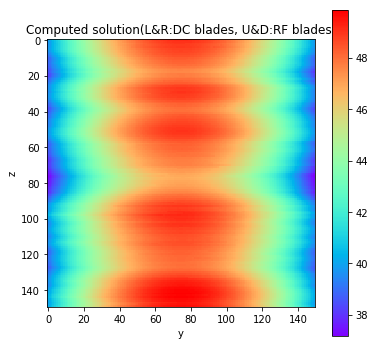

In [105]:
f=open("u_xz_z_list_start=8_12=100V.pkl", 'r')
u_xz_list = pkl.load(f)
f.close()
n_grid_points=150
u_xz = u_xz_list.reshape((n_grid_points,n_grid_points))


# Plot the image

plt.figure(figsize=(6,6))
# cmap = sns.diverging_palette(220, 20, n=7,as_cmap=True)
data = u_xz.T
plt.imshow(data,aspect=1.0,cmap='rainbow')
plt.title('Computed solution(L&R:DC blades, U&D:RF blades)')
plt.xlabel('y')
plt.ylabel('z')
plt.colorbar()

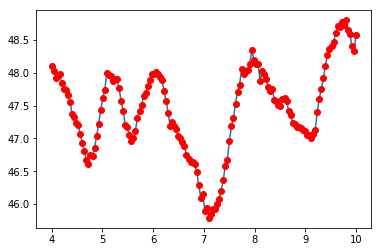

In [106]:
plt.plot(np.linspace(4, 10, n_grid_points), u_xz[50,:])
plt.plot(np.linspace(4, 10, n_grid_points), u_xz[50,:],'ro')

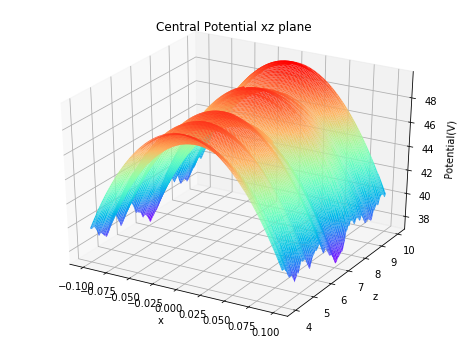

In [107]:
xz_grid = np.mgrid[-0.1:0.1:n_grid_points*1j,     # 指定x范围，1j不表示虚数，而是指grid包含两个端点。
                     z1:z2:n_grid_points*1j]     # 指定y范围
                  # 指定z平面
xz_points = np.vstack(( xz_grid[0].ravel(),
                     np.zeros(yz_grid[0].size),
                      xz_grid[1].ravel()))
plt.figure(figsize=(8,6))
ax=plt.subplot(111,projection='3d')
ax.plot_surface(xz_grid[0],xz_grid[1],u_xz,rstride=1,cstride=1,cmap='rainbow')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('Potential(V)')
plt.title("Central Potential xz plane")
p.show()